In [1]:
#Import Main Libraries
import numpy as np
import sympy as sp
from sympy import *
import matplotlib.pyplot as plt
import sys

#Max Dittman's Module - not really used in this code
import aeromod as mod

1. ### Prandtl-Meyer Functon, First and Second Derivative Functions

In [2]:
#Base Prandtl Meyer Function, First Derivative, and then Second Derivative
def prandtlMeyer(M, g):
    if M < 1: return np.nan
    else: return (np.sqrt((g+1)/(g-1))*np.arctan(np.sqrt(((g-1)/(g+1))*(M**2-1)))-np.arctan(np.sqrt(M**2-1)))
def prandtlMeyerFirst(M, g):
    if M < 1: return np.nan
    else: return (2*(np.sqrt(M**2-1))/(g*M**3-M**3+2*M))
def prandtlMeyerSecond(M, g):
    if M < 1: return np.nan
    else:
        denominator = (M**2*np.sqrt(-1+M**2)*(2+(-1+g)*M**2)**2)
        if denominator == 0: return np.nan
        else: return (4+6*(-1+g)*M**2-4*(-1+g)*M**4)/(M**2*np.sqrt(-1+M**2)*(2+(-1+g)*M**2)**2)

n, M, g = symbols(r'\nu M \gamma')
n1 = (sqrt((g+1)/(g-1))*atan(sqrt(((g-1)/(g+1))*(M**2-1)))-atan(sqrt(M**2-1)))
n2 = diff(n1, M)
n3 = diff(n1, M, 2)

In [3]:
n1

sqrt((\gamma + 1)/(\gamma - 1))*atan(sqrt((M**2 - 1)*(\gamma - 1)/(\gamma + 1))) - atan(sqrt(M**2 - 1))

In [4]:
n2

M*sqrt((\gamma + 1)/(\gamma - 1))*sqrt((M**2 - 1)*(\gamma - 1)/(\gamma + 1))/((M**2 - 1)*((M**2 - 1)*(\gamma - 1)/(\gamma + 1) + 1)) - 1/(M*sqrt(M**2 - 1))

In [5]:
n3

-2*M**2*sqrt((\gamma + 1)/(\gamma - 1))*sqrt((M**2 - 1)*(\gamma - 1)/(\gamma + 1))*(\gamma - 1)/((M**2 - 1)*(\gamma + 1)*((M**2 - 1)*(\gamma - 1)/(\gamma + 1) + 1)**2) - M**2*sqrt((\gamma + 1)/(\gamma - 1))*sqrt((M**2 - 1)*(\gamma - 1)/(\gamma + 1))/((M**2 - 1)**2*((M**2 - 1)*(\gamma - 1)/(\gamma + 1) + 1)) + sqrt((\gamma + 1)/(\gamma - 1))*sqrt((M**2 - 1)*(\gamma - 1)/(\gamma + 1))/((M**2 - 1)*((M**2 - 1)*(\gamma - 1)/(\gamma + 1) + 1)) + (M**2 - 1)**(-3/2) + 1/(M**2*sqrt(M**2 - 1))

2. ### Finite Difference Methods Estimating First and Second Derivative with M values between 1 <= M <= 5

In [6]:
#Initalizing Values
gamma = 1.4
delta = 0.001
M_Values = np.linspace(1, 5, 50)

#Initalizing Lists - Theres alot of them
calculatedDerivativesFirst = []
calculatedDerivativesSecond = []
prandtlMeyerCentralFirst = []
prandtlMeyerCentralSecond = []
prandtlMeyerForwardFOFirst = []
prandtlMeyerForwardFOSecond = []
prandtlMeyerForwardSOFirst = []
prandtlMeyerForwardSOSecond = []
errorsOne = []
errorsTwo = []
errorsThree = []
errorsFour = []
errorsFive = []
errorsSix = []

#Calculates normal first derivatives with initialized values and stores them to a list
for i in range(len(M_Values)):
    tempVar = prandtlMeyerFirst(M_Values[i],gamma)
    calculatedDerivativesFirst.append(tempVar)
#Calculates normal second derivatives with initialized values and stores them to a list
for i in range(len(M_Values)):
    tempVar = prandtlMeyerSecond(M_Values[i],gamma)
    calculatedDerivativesSecond.append(tempVar)

2. #### Part A: Central Differences

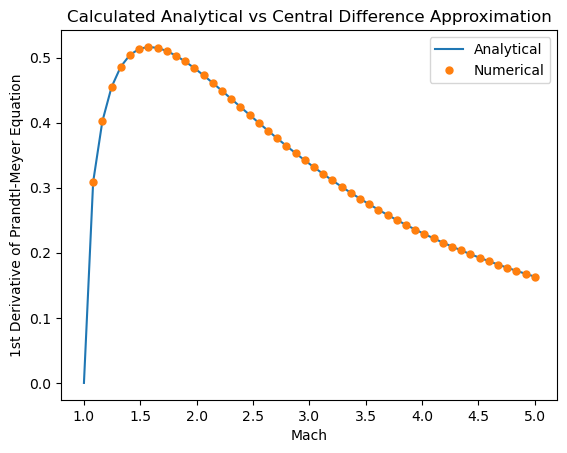

In [7]:
#Numerical Differention Method: central difference for the first derivative
def centralDifferenceFirst(f, x, d, *args): return (f(x + d, *args) - f(x - d, *args)) / (2 * d)

#Approximates using numerical differention with initialized values
for i in range(len(M_Values)):
    tempVar = centralDifferenceFirst(prandtlMeyer, M_Values[i], delta, gamma)
    prandtlMeyerCentralFirst.append(tempVar)

#Plots calculated values versus approximated values
plt.plot(M_Values, calculatedDerivativesFirst, label="Analytical")
plt.plot(M_Values, prandtlMeyerCentralFirst, label="Numerical", marker="o", markersize=5, linestyle="None")
plt.title("Calculated Analytical vs Central Difference Approximation")
plt.xlabel("Mach")
plt.ylabel("1st Derivative of Prandtl-Meyer Equation")
plt.legend()
plt.show()

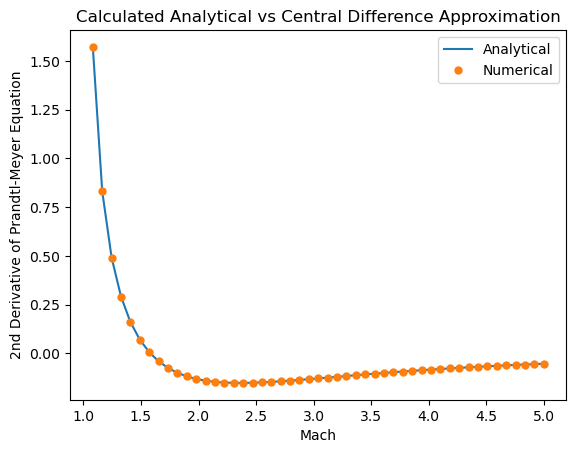

In [8]:
#Numerical Differention Method: central difference for the second derivative
def centralDifferenceSecond(f, x, d, *args): return (f(x + d, *args) - 2 * f(x, *args) + f(x - d, *args)) / (d ** 2)

#Approximates using numerical differention with initialized values
for i in range(len(M_Values)):
    tempVar = centralDifferenceSecond(prandtlMeyer, M_Values[i], delta, gamma)
    prandtlMeyerCentralSecond.append(tempVar)

#Plots calculated values versus approximated values
plt.plot(M_Values, calculatedDerivativesSecond, label="Analytical")
plt.plot(M_Values, prandtlMeyerCentralSecond, label="Numerical", marker="o", markersize=5, linestyle="None")
plt.title("Calculated Analytical vs Central Difference Approximation")
plt.xlabel("Mach")
plt.ylabel('2nd Derivative of Prandtl-Meyer Equation')
plt.legend()
plt.show()

2. #### Part B: First One Sided First Order Differences

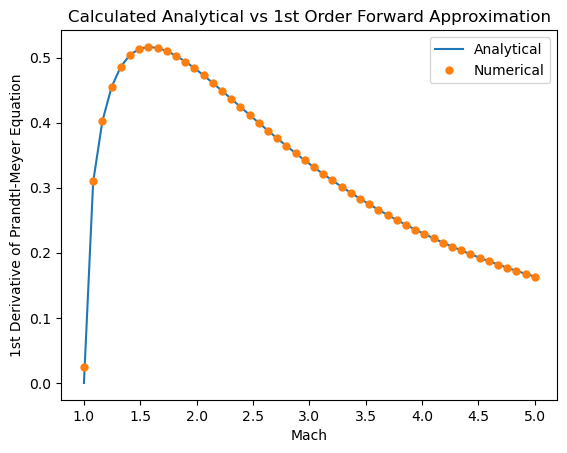

In [9]:
#Numerical Differention Method: forward difference for the first derivative
def forwardDifferenceFOFirst(f, x, d, *args): return (f(x + d, *args) - f(x, *args)) / d

#Approximates using numerical differention with initialized values
for i in range(0, len(M_Values)):
    tempVar = forwardDifferenceFOFirst(prandtlMeyer, M_Values[i], delta, gamma)
    prandtlMeyerForwardFOFirst.append(tempVar)

#Plots calculated values versus approximated values
plt.plot(M_Values, calculatedDerivativesFirst, label="Analytical")
plt.plot(M_Values, prandtlMeyerForwardFOFirst, label="Numerical", marker="o", markersize=5, linestyle="None")
plt.title("Calculated Analytical vs 1st Order Forward Approximation")
plt.xlabel("Mach")
plt.ylabel("1st Derivative of Prandtl-Meyer Equation")
plt.legend()
plt.show()

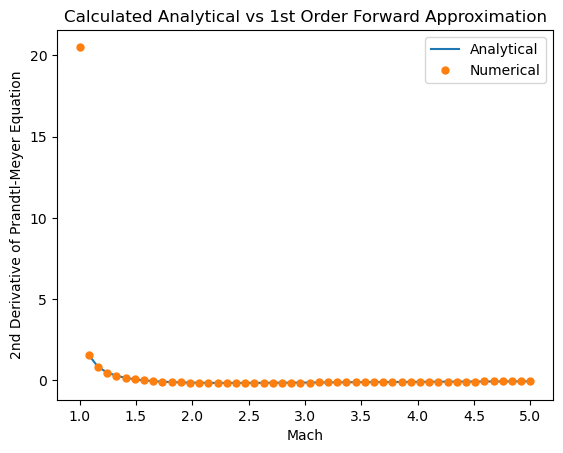

In [10]:
#Numerical Differention Method: forward difference for the second derivative
def forwardDifferenceFOSecond(f, x, d, *args): return (f(x + 2*d, *args) - 2*f(x + d, *args) + f(x, *args)) / (d**2)

#Approximates using numerical differention with initialized values
for i in range(0, len(M_Values)):
    tempVar = forwardDifferenceFOSecond(prandtlMeyer, M_Values[i], delta, gamma)
    prandtlMeyerForwardFOSecond.append(tempVar)

#Plots calculated values versus approximated values
plt.plot(M_Values, calculatedDerivativesSecond, label="Analytical")
plt.plot(M_Values, prandtlMeyerForwardFOSecond, label="Numerical", marker="o", markersize=5, linestyle="None")
plt.title("Calculated Analytical vs 1st Order Forward Approximation")
plt.xlabel("Mach")
plt.ylabel('2nd Derivative of Prandtl-Meyer Equation')
plt.legend()
plt.show()

2. #### Part C: Forward One Sided Second Order Differences

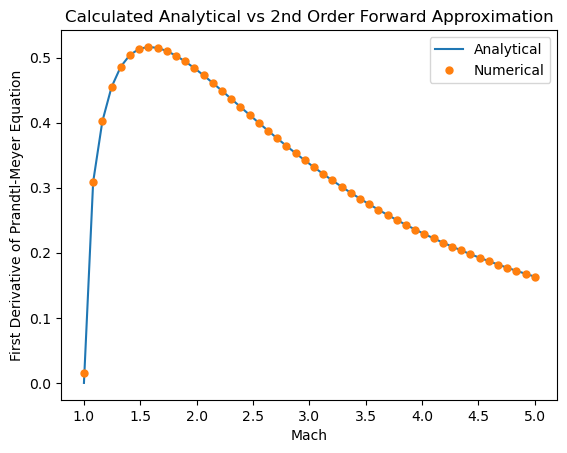

In [11]:
#Numerical Differention Method: forward difference of the second order for the first derivative
def forwardDifferenceSOFirst(f, x, d, *args): return (-3 * f(x, *args) + 4 * f(x + d, *args) - f(x + 2 * d, *args)) / (2 * d)

#Approximates using numerical differention with initialized values
for i in range(0, len(M_Values)):
    tempVar = forwardDifferenceSOFirst(prandtlMeyer, M_Values[i], delta, gamma)
    prandtlMeyerForwardSOFirst.append(tempVar)

#Plots calculated values versus approximated values
plt.plot(M_Values, calculatedDerivativesFirst, label="Analytical")
plt.plot(M_Values, prandtlMeyerForwardSOFirst, label="Numerical", marker="o", markersize=5, linestyle="None")
plt.title("Calculated Analytical vs 2nd Order Forward Approximation")
plt.xlabel("Mach")
plt.ylabel("First Derivative of Prandtl-Meyer Equation")
plt.legend()
plt.show()

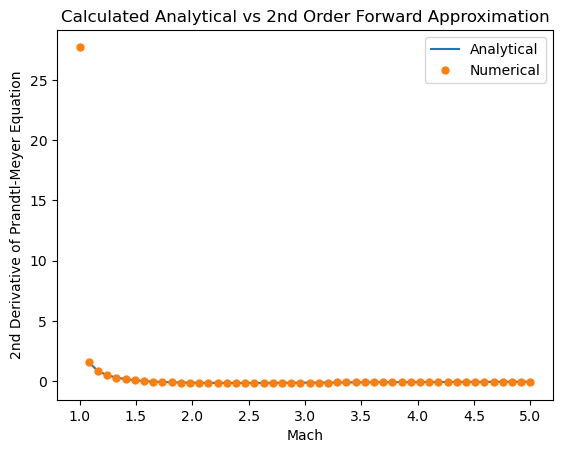

In [12]:
#Numerical Differention Method: forward difference of the second order for the second derivative
#def forwardDifferenceSOSecond(f, x, d, *args): return (f(x, *args) - 2 * f(x + d, *args) + f(x + 2 * d, *args)) / (d**2)
def forwardDifferenceSOSecond(f, x, d, *args): return (4*f(x + 2*d, *args) - 5*f(x + d, *args) + 2*f(x, *args) - f(x + 3*d, *args)) / (d**2)
#Approximates using numerical differention with initialized values
for i in range(0, len(M_Values)):
    tempVar = forwardDifferenceSOSecond(prandtlMeyer, M_Values[i], delta, gamma)
    prandtlMeyerForwardSOSecond.append(tempVar)

#Plots calculated values versus approximated values
plt.plot(M_Values, calculatedDerivativesSecond, label="Analytical")
plt.plot(M_Values, prandtlMeyerForwardSOSecond, label="Numerical", marker="o", markersize=5, linestyle="None")
plt.title("Calculated Analytical vs 2nd Order Forward Approximation")
plt.xlabel("Mach")
plt.ylabel('2nd Derivative of Prandtl-Meyer Equation')
plt.legend()
plt.show()

3. ### Error Calculations Using Different Delta M Values

In [13]:
#Delta M list
DeltaMList = [0.1e-0,0.1e-1,0.1e-2,0.1e-3,0.1e-4,0.1e-5,0.1e-6,0.1e-7,0.1e-8,0.1e-9,0.1e-10,0.1e-11,0.1e-12,0.1e-13]

3. #### Central Differences

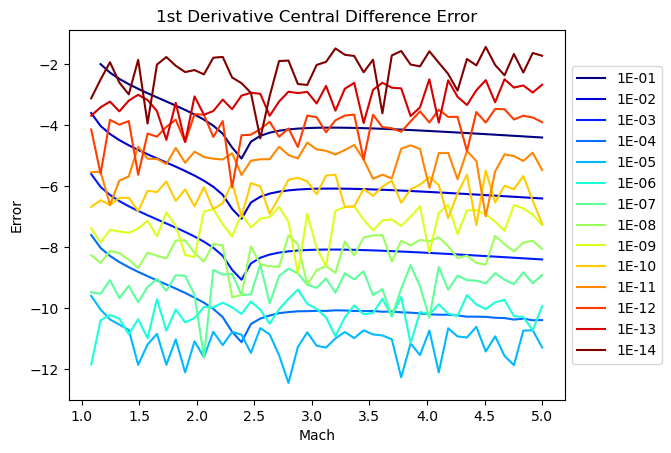

In [14]:
#For loop that runs the Delta M values given through
#This logic took me like 3 hours - coding high after solving though
for i in range(0, len(DeltaMList)):
    tempVarList = []
    for j in range(0, len(M_Values)):
        tempVar = centralDifferenceFirst(prandtlMeyer, M_Values[j], DeltaMList[i], gamma)
        tempVarList.append(tempVar)
        errorTemp = np.log10(np.abs(calculatedDerivativesFirst[j] - tempVar))
        errorsOne.append(errorTemp) 

#Plots values that are transformed into log - uses a for loop to plot 14 different values
colors = plt.cm.jet(np.linspace(0, 1, len(DeltaMList)))
for i in range(len(DeltaMList)):
    plt.plot(M_Values, errorsOne[i*len(M_Values):(i+1)*len(M_Values)], label="{:.0E}".format(DeltaMList[i]), color=colors[i])
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.title("1st Derivative Central Difference Error")
plt.xlabel("Mach")
plt.ylabel("Error")
plt.show()

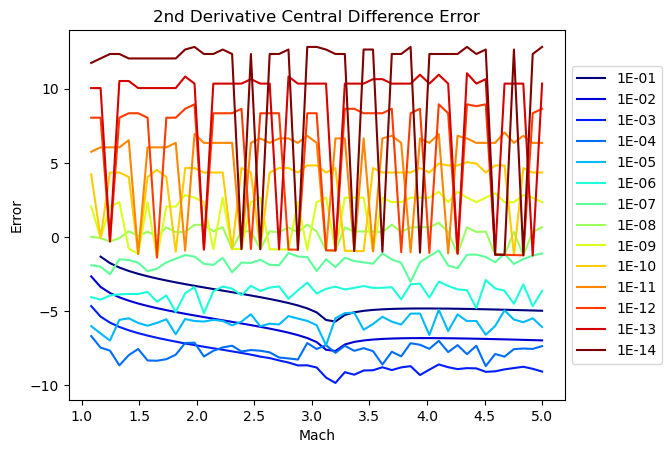

In [15]:
#For loop that runs the Delta M values given through
for i in range(0, len(DeltaMList)):
    tempVarList = []
    for j in range(0, len(M_Values)):
        tempVar = centralDifferenceSecond(prandtlMeyer, M_Values[j], DeltaMList[i], gamma)
        tempVarList.append(tempVar)
        errorTemp = np.log10(np.abs(calculatedDerivativesSecond[j] - tempVar))
        errorsTwo.append(errorTemp) 

#Plots values that are transformed into log - uses a for loop to plot 14 different values
colors = plt.cm.jet(np.linspace(0, 1, len(DeltaMList)))
for i in range(len(DeltaMList)):
    plt.plot(M_Values, errorsTwo[i*len(M_Values):(i+1)*len(M_Values)], label="{:.0E}".format(DeltaMList[i]), color=colors[i])
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.title("2nd Derivative Central Difference Error")
plt.xlabel("Mach")
plt.ylabel("Error")
plt.show()

3. #### 1st Forward

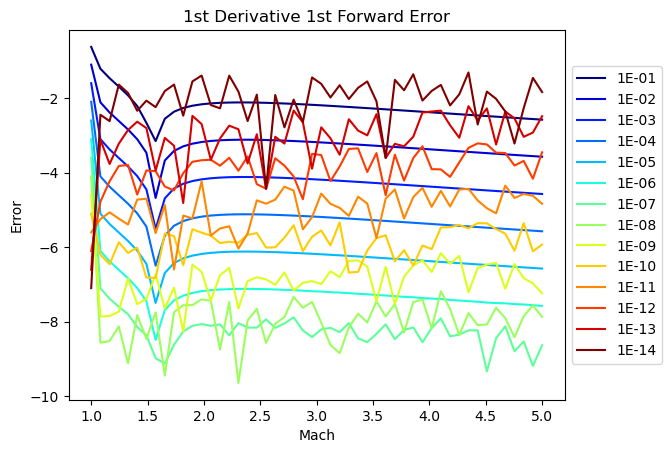

In [16]:
#For loop that runs the Delta M values given through
for i in range(0, len(DeltaMList)):
    tempVarList = []
    for j in range(0, len(M_Values)):
        tempVar = forwardDifferenceFOFirst(prandtlMeyer, M_Values[j], DeltaMList[i], gamma)
        tempVarList.append(tempVar)
        errorTemp = np.log10(np.abs(calculatedDerivativesFirst[j] - tempVar))
        errorsThree.append(errorTemp) 

#Plots values that are transformed into log - uses a for loop to plot 14 different values
colors = plt.cm.jet(np.linspace(0, 1, len(DeltaMList)))
for i in range(len(DeltaMList)):
    plt.plot(M_Values, errorsThree[i*len(M_Values):(i+1)*len(M_Values)], label="{:.0E}".format(DeltaMList[i]), color=colors[i])
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.title("1st Derivative 1st Forward Error")
plt.xlabel("Mach")
plt.ylabel("Error")
plt.show()

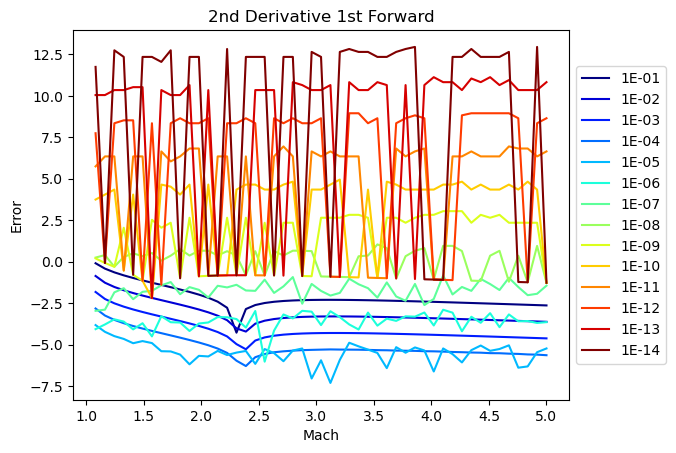

In [17]:
#For loop that runs the Delta M values given through
for i in range(0, len(DeltaMList)):
    tempVarList = []
    for j in range(0, len(M_Values)):
        tempVar = forwardDifferenceFOSecond(prandtlMeyer, M_Values[j], DeltaMList[i], gamma)
        tempVarList.append(tempVar)
        errorTemp = np.log10(np.abs(calculatedDerivativesSecond[j] - tempVar))
        errorsFour.append(errorTemp) 

#Plots values that are transformed into log - uses a for loop to plot 14 different values
colors = plt.cm.jet(np.linspace(0, 1, len(DeltaMList)))
for i in range(len(DeltaMList)):
    plt.plot(M_Values, errorsFour[i*len(M_Values):(i+1)*len(M_Values)], label="{:.0E}".format(DeltaMList[i]), color=colors[i])
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.title("2nd Derivative 1st Forward")
plt.xlabel("Mach")
plt.ylabel("Error")
plt.show()

3. #### Second Forward

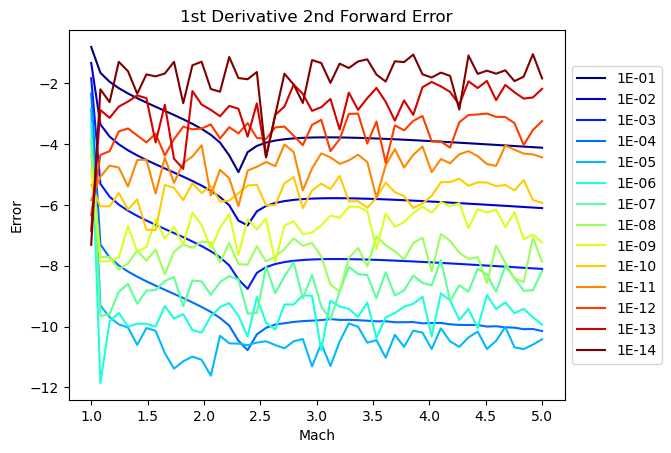

In [18]:
#For loop that runs the Delta M values given through
for i in range(0, len(DeltaMList)):
    tempVarList = []
    for j in range(0, len(M_Values)):
        tempVar = forwardDifferenceSOFirst(prandtlMeyer, M_Values[j], DeltaMList[i], gamma)
        tempVarList.append(tempVar)
        errorTemp = np.log10(np.abs(calculatedDerivativesFirst[j] - tempVar))
        errorsFive.append(errorTemp)

#Plots values that are transformed into log - uses a for loop to plot 14 different values
colors = plt.cm.jet(np.linspace(0, 1, len(DeltaMList)))
for i in range(len(DeltaMList)):
    plt.plot(M_Values, errorsFive[i*len(M_Values):(i+1)*len(M_Values)], label="{:.0E}".format(DeltaMList[i]), color=colors[i])
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.title("1st Derivative 2nd Forward Error")
plt.xlabel("Mach")
plt.ylabel("Error")
plt.show()

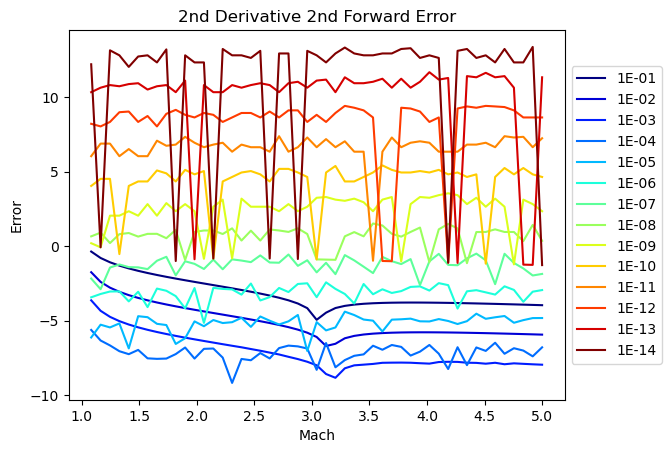

In [19]:
#For loop that runs the Delta M values given through
for i in range(0, len(DeltaMList)):
    tempVarList = []
    for j in range(0, len(M_Values)):
        tempVar = forwardDifferenceSOSecond(prandtlMeyer, M_Values[j], DeltaMList[i], gamma)
        tempVarList.append(tempVar)
        errorTemp = np.log10(np.abs(calculatedDerivativesSecond[j] - tempVar))
        errorsSix.append(errorTemp)

#Plots values that are transformed into log - uses a for loop to plot 14 different values
colors = plt.cm.jet(np.linspace(0, 1, len(DeltaMList)))
for i in range(len(DeltaMList)):
    plt.plot(M_Values, errorsSix[i*len(M_Values):(i+1)*len(M_Values)], label="{:.0E}".format(DeltaMList[i]), color=colors[i])
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.title("2nd Derivative 2nd Forward Error")
plt.xlabel("Mach")
plt.ylabel("Error")
plt.show()

4. ### Plot errors for M=1.3 on two plots, first derivative approx error and second derivative approx error

In [20]:
#Initalizing Values
gamma = 1.4
delta = 0.001
M_Values = 1.3
#M_Values = 4

#Initializing Lists
Pt4calculatedDerivativeFirst = []
Pt4prandtlMeyerCentralFirst = []
Pt4prandtlMeyerForwardFOFirst = []
Pt4prandtlMeyerForwardSOFirst = []
Pt4calculatedDerivativeSecond = []
Pt4prandtlMeyerCentralSecond = []
Pt4prandtlMeyerForwardFOSecond = []
Pt4prandtlMeyerForwardSOSecond = []
Pt4errorsOne = [0] * len(DeltaMList)
Pt4errorsTwo = [0] * len(DeltaMList)
Pt4errorsThree = [0] * len(DeltaMList)
Pt4errorsFour = [0] * len(DeltaMList)
Pt4errorsFive = [0] * len(DeltaMList)
Pt4errorsSix = [0] * len(DeltaMList)

#Calculates normal first derivative with initialized values
tempVar = prandtlMeyerFirst(M_Values,gamma)
Pt4calculatedDerivativeFirst.append(tempVar)

#Calculates normal second derivative with initialized values
tempVar = prandtlMeyerSecond(M_Values,gamma)
Pt4calculatedDerivativeSecond.append(tempVar)

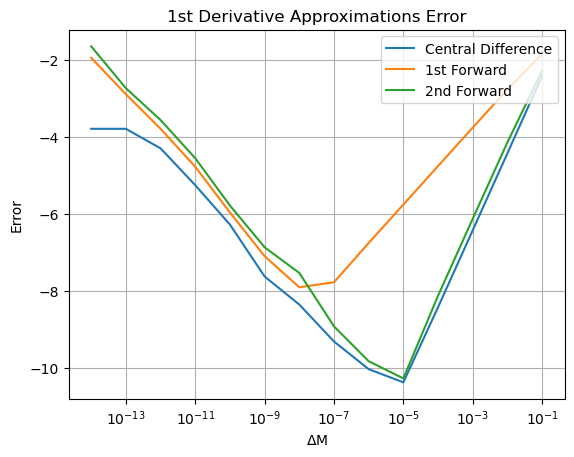

In [21]:
for i in range(len(DeltaMList)):
    #Central Difference
    tempVar = centralDifferenceFirst(prandtlMeyer, M_Values, DeltaMList[i], gamma)
    Pt4prandtlMeyerCentralFirst.append(tempVar)
    Pt4errorsOne[i] = np.log10(np.abs(Pt4calculatedDerivativeFirst[0]-Pt4prandtlMeyerCentralFirst[i]))

    #Forward One
    tempVar = forwardDifferenceFOFirst(prandtlMeyer, M_Values, DeltaMList[i], gamma)
    Pt4prandtlMeyerForwardFOFirst.append(tempVar)
    Pt4errorsTwo[i] = np.log10(np.abs(Pt4calculatedDerivativeFirst[0]-Pt4prandtlMeyerForwardFOFirst[i]))
    
    #Forward Two
    tempVar = forwardDifferenceSOFirst(prandtlMeyer, M_Values, DeltaMList[i], gamma)
    Pt4prandtlMeyerForwardSOFirst.append(tempVar)
    Pt4errorsThree[i] = np.log10(np.abs(Pt4calculatedDerivativeFirst[0]-Pt4prandtlMeyerForwardSOFirst[i]))

plt.semilogx(DeltaMList, Pt4errorsOne, label="Central Difference")
plt.semilogx(DeltaMList, Pt4errorsTwo, label="1st Forward")
plt.semilogx(DeltaMList, Pt4errorsThree, label="2nd Forward")
plt.legend(loc = "upper right")
plt.title("1st Derivative Approximations Error")
plt.xlabel("$\Delta$M")
plt.ylabel("Error")
plt.grid()
plt.show()

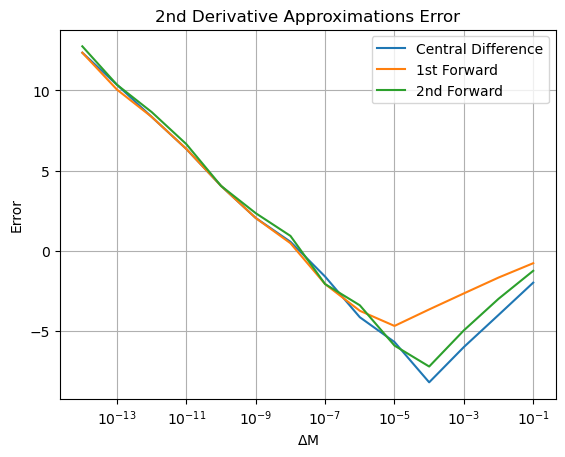

In [22]:
for i in range(len(DeltaMList)):
    #Central Difference
    tempVar = centralDifferenceSecond(prandtlMeyer, M_Values, DeltaMList[i], gamma)
    Pt4prandtlMeyerCentralSecond.append(tempVar)
    Pt4errorsFour[i] = np.log10(np.abs(Pt4calculatedDerivativeSecond[0]-Pt4prandtlMeyerCentralSecond[i]))

    #Forward One
    tempVar = forwardDifferenceFOSecond(prandtlMeyer, M_Values, DeltaMList[i], gamma)
    Pt4prandtlMeyerForwardFOSecond.append(tempVar)
    Pt4errorsFive[i] = np.log10(np.abs(Pt4calculatedDerivativeSecond[0]-Pt4prandtlMeyerForwardFOSecond[i]))
    
    #Forward Two
    tempVar = forwardDifferenceSOSecond(prandtlMeyer, M_Values, DeltaMList[i], gamma)
    Pt4prandtlMeyerForwardSOSecond.append(tempVar)
    Pt4errorsSix[i] = np.log10(np.abs(Pt4calculatedDerivativeSecond[0]-Pt4prandtlMeyerForwardSOSecond[i]))

plt.semilogx(DeltaMList, Pt4errorsFour, label="Central Difference")
plt.semilogx(DeltaMList, Pt4errorsFive, label="1st Forward")
plt.semilogx(DeltaMList, Pt4errorsSix, label="2nd Forward")
plt.legend(loc = "upper right")
plt.title("2nd Derivative Approximations Error")
plt.xlabel("$\Delta$M")
plt.ylabel("Error")
plt.grid()
plt.show()

Write a small paragraph describing the optimum Δ𝑀 based on your results:
By looking at the two plots we can see what delta M value produces the lowest error. Since the plots are log functions, the error value of zero is not the lowest error but the lowest point on the graph. This is helpful for visualization of large values and simplifys analyzing the data. For the first derivative, it seems that Delta M of 10^-5 is the most optimum M value while the 10*-4 is the most optimum Delta M value of the second derivative. Central Difference appears to be the most optimal method for finding the most optimal solution. 

### Notes